In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')


## Explore the dataset
We will upload the training dataset and explore the dataset. Our goal is to predict the income based on certain features. 

In [245]:
df = pd.read_csv('training_features.csv')
del df['Unnamed: 0']

In [246]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,"45,","Private,","170871,","HS-grad,","9,","Married-civ-spouse,","Craft-repair,","Husband,","White,","Male,","7298,","0,","60,","United-States,"
1,"47,","State-gov,","108890,","HS-grad,","9,","Divorced,","Adm-clerical,","Unmarried,","White,","Female,","1831,","0,","38,","United-States,"
2,"48,","Private,","187505,","Some-college,","10,","Married-civ-spouse,","Sales,","Husband,","White,","Male,","0,","0,","50,","United-States,"
3,"29,","Private,","145592,","HS-grad,","9,","Never-married,","Craft-repair,","Not-in-family,","White,","Male,","0,","0,","40,","Guatemala,"
4,"23,","Private,","203003,","7th-8th,","4,","Never-married,","Craft-repair,","Not-in-family,","White,","Male,","0,","0,","25,","Germany,"


All the feature column has a comma and this has to be removed,we will remove the comma from all the column.

In [247]:
df = df.replace(',','',regex = True)

In [248]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,45,Private,170871,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,60,United-States
1,47,State-gov,108890,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,1831,0,38,United-States
2,48,Private,187505,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States
3,29,Private,145592,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Guatemala
4,23,Private,203003,7th-8th,4,Never-married,Craft-repair,Not-in-family,White,Male,0,0,25,Germany


In [249]:
df = df.drop(['fnlwgt'],axis=1)
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,45,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,60,United-States
1,47,State-gov,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,1831,0,38,United-States
2,48,Private,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States
3,29,Private,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Guatemala
4,23,Private,7th-8th,4,Never-married,Craft-repair,Not-in-family,White,Male,0,0,25,Germany


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22792 entries, 0 to 22791
Data columns (total 13 columns):
age               22792 non-null object
workclass         22792 non-null object
education         22792 non-null object
education-num     22792 non-null object
marital-status    22792 non-null object
occupation        22792 non-null object
relationship      22792 non-null object
race              22792 non-null object
sex               22792 non-null object
capital-gain      22792 non-null object
capital-loss      22792 non-null object
hours-per-week    22792 non-null object
native-country    22792 non-null object
dtypes: object(13)
memory usage: 2.3+ MB


We can see that columns such as age,fnlwgt,eduction-num,capital-gain,capital-loss and hours-per-week are supposed to be numerical but they are object type data. This will create a problem when we use scaling. We will change those columns to numeric.

In [253]:
cols = ['age','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[cols] = df[cols].apply(pd.to_numeric,errors='coerce')

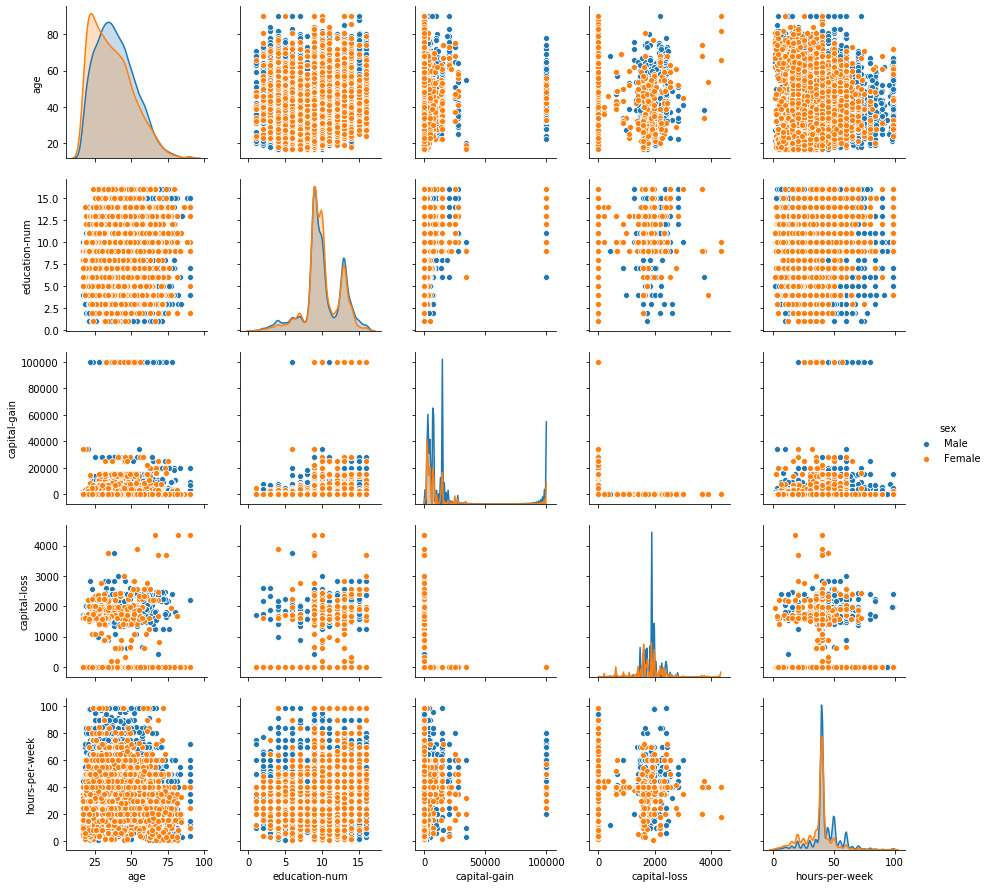

In [254]:

sns.pairplot(df,vars =cols,diag_kind="kde",hue='sex')

In [255]:
df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', 'Bachelors', 'Prof-school',
       '10th', 'Masters', '11th', 'Assoc-acdm', '1st-4th', 'Assoc-voc',
       '9th', '5th-6th', 'Preschool', '12th', 'Doctorate'], dtype=object)

We will load the label dataset and merge it with the feature dataset. Any rows removed from the feature dataset has to be the one in the label dataset.

In [256]:
df_labels = pd.read_csv('training_labels.csv')

In [257]:
df_labels.shape

(22792, 1)

Text(0, 0.5, 'Count')

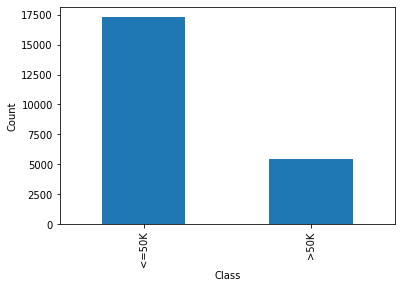

In [258]:
count_class = df_labels['income'].value_counts()
count_class.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')

There is some class imbalance but this should not be a concern as we have enough class labels for the minorty class. If the ratio of minority class and majority class was huge, we would have to either create a synthetic minority class or reduce the majority class.

In [259]:
df['native-country'].unique()

array(['United-States', 'Guatemala', 'Germany', 'Columbia', 'Philippines',
       'Puerto-Rico', '?', 'Ireland', 'Italy', 'Taiwan', 'Mexico',
       'Thailand', 'France', 'Greece', 'Portugal', 'Hong',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Haiti', 'El-Salvador',
       'Dominican-Republic', 'Poland', 'Iran', 'Jamaica', 'Canada',
       'England', 'Hungary', 'Yugoslavia', 'India', 'Japan', 'Laos',
       'Vietnam', 'Cambodia', 'South', 'China', 'Honduras', 'Cuba',
       'Trinadad&Tobago', 'Ecuador', 'Peru', 'Nicaragua',
       'Holand-Netherlands'], dtype=object)

After exploring the native-country column, we found out that we had '?' has one of the values. Before we do anything with the rows contaning the '?', we will join the train_label dataset and drop the rows with '?' in it. Looking at the race column for the values where there were '?', we could think this as being United-State but this we should not jump to this conclusion. 

In [260]:
df.loc[df['native-country']=='?']['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other'], dtype=object)

In [261]:
df_new = pd.merge(df, df_labels, left_index=True, right_index=True)

In [262]:
df_new.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,45,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,60,United-States,>50K
1,47,State-gov,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,1831,0,38,United-States,<=50K
2,48,Private,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K
3,29,Private,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Guatemala,<=50K
4,23,Private,7th-8th,4,Never-married,Craft-repair,Not-in-family,White,Male,0,0,25,Germany,<=50K


In [263]:
df_new = df_new.loc[df_new['native-country']!='?']

In [264]:
df_new['native-country'].unique()

array(['United-States', 'Guatemala', 'Germany', 'Columbia', 'Philippines',
       'Puerto-Rico', 'Ireland', 'Italy', 'Taiwan', 'Mexico', 'Thailand',
       'France', 'Greece', 'Portugal', 'Hong',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Haiti', 'El-Salvador',
       'Dominican-Republic', 'Poland', 'Iran', 'Jamaica', 'Canada',
       'England', 'Hungary', 'Yugoslavia', 'India', 'Japan', 'Laos',
       'Vietnam', 'Cambodia', 'South', 'China', 'Honduras', 'Cuba',
       'Trinadad&Tobago', 'Ecuador', 'Peru', 'Nicaragua',
       'Holand-Netherlands'], dtype=object)

In [265]:
df_new.loc[df_new['occupation']=='?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
9,21,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
25,66,?,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,20,United-States,<=50K
46,68,?,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,8,United-States,<=50K
70,40,?,Some-college,10,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
99,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22752,19,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,25,United-States,<=50K
22759,61,?,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,0,55,United-States,<=50K
22781,17,?,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
22784,34,?,7th-8th,4,Separated,?,Unmarried,Black,Female,0,0,40,United-States,<=50K


In [266]:
df_new = df_new.loc[df_new['occupation']!='?']

We also found '?' in workclass and occupation column. Since '?' was common for these columns we dropped the rows having those '?' values.

In [267]:
df_new.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,45,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,60,United-States,>50K
1,47,State-gov,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,1831,0,38,United-States,<=50K
2,48,Private,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K
3,29,Private,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Guatemala,<=50K
4,23,Private,7th-8th,4,Never-married,Craft-repair,Not-in-family,White,Male,0,0,25,Germany,<=50K


Text(0, 0.5, 'Count')

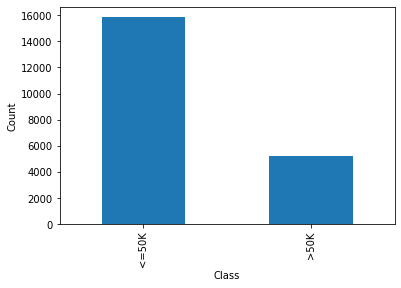

In [268]:
count_class = df_new['income'].value_counts()
count_class.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')

Text(0.5, 1.0, 'Income vs Number of hours worked per week')

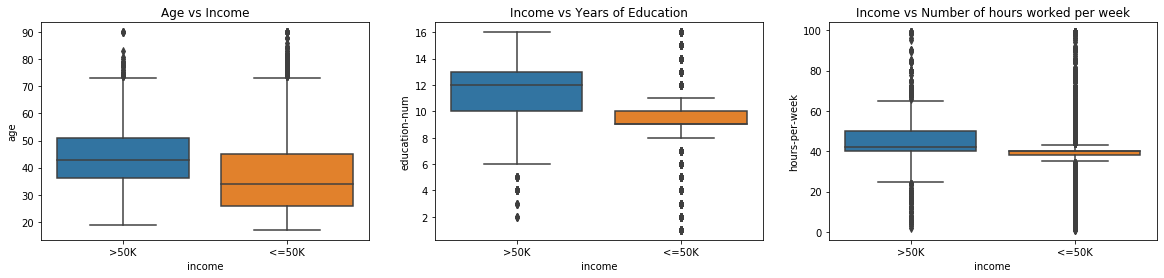

In [269]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))
sns.boxplot(x="income", y="age", data=df_new, ax=axes[0])
axes[0].set_title('Age vs Income')
sns.boxplot(x="income", y="education-num", data=df_new, ax=axes[1])
axes[1].set_title('Income vs Years of Education')
sns.boxplot(x="income", y="hours-per-week", data=df_new, ax=axes[2])
axes[2].set_title('Income vs Number of hours worked per week')



From the above box plot,the chances to have >50K income incrsears with age. Most young people have lower wages or <=50K. Having higher number of years of education also means that there is higher chances to make >50K. Most people working longer hours also tend to make >50K.

## Data Preparation
Before the data is fed into the machine learning algorithms, we will preprocess the dataset. We will transform the right skewed dataset and a log transformation work for right skewd dataset. If the dataset was left skewed, we could use square or cube root transformation.

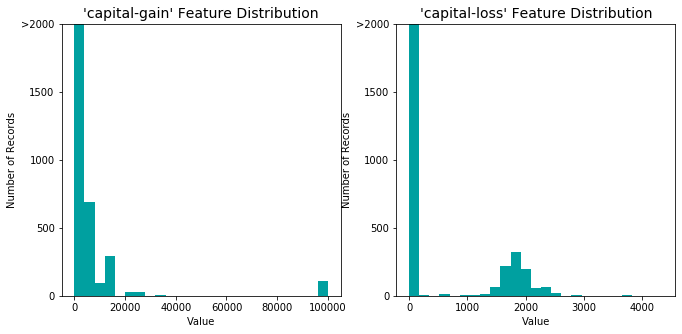

In [270]:
fig = plt.figure(figsize = (11,5));
for i, feature in enumerate(['capital-gain','capital-loss']):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(df_new[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 2000))
        ax.set_yticks([0, 500, 1000, 1500, 2000])
        ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])


In [271]:
skewed = ['capital-gain','capital-loss']
df_new[skewed] = df_new[skewed].apply(lambda x: np.log(x+1))

This stackexchange provides some information about log transformation of skewed dataset.
https://stats.stackexchange.com/questions/107610/what-is-the-reason-the-log-transformation-is-used-with-right-skewed-distribution

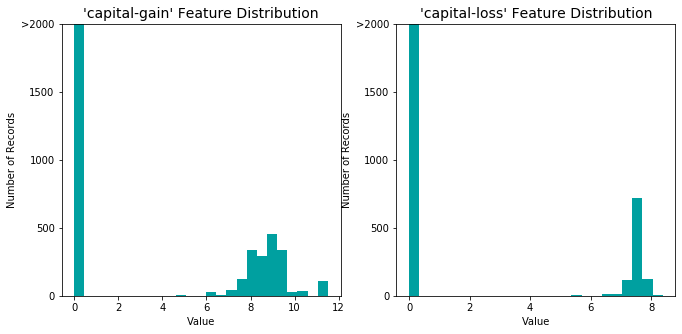

In [272]:
fig = plt.figure(figsize = (11,5));
for i, feature in enumerate(['capital-gain','capital-loss']):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(df_new[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 2000))
        ax.set_yticks([0, 500, 1000, 1500, 2000])
        ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

In [273]:
income = df_new['income']

In [274]:
income.head()

0     >50K
1    <=50K
2     >50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [275]:
df_new= df_new.drop('income',axis=1)

### Normalizing Numerical Features
Numerical features has been scaled using MinMaxScaler using the sklearn library. This transformation will ensure that each feature is treated equally when a supervised learner is applied. 

In [276]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()

In [277]:
numerical = ['age','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [278]:
df_new = pd.DataFrame(data=df_new)
df_new[numerical] = scaler.fit_transform(df_new[numerical])

In [279]:
df_new.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.383562,Private,HS-grad,0.533333,Married-civ-spouse,Craft-repair,Husband,White,Male,0.772653,0.0,0.602041,United-States
1,0.410959,State-gov,HS-grad,0.533333,Divorced,Adm-clerical,Unmarried,White,Female,0.652585,0.0,0.377551,United-States
2,0.424658,Private,Some-college,0.600000,Married-civ-spouse,Sales,Husband,White,Male,0.000000,0.0,0.500000,United-States
3,0.164384,Private,HS-grad,0.533333,Never-married,Craft-repair,Not-in-family,White,Male,0.000000,0.0,0.397959,Guatemala
4,0.082192,Private,7th-8th,0.200000,Never-married,Craft-repair,Not-in-family,White,Male,0.000000,0.0,0.244898,Germany


Machine learning algorithms expect input to be numeric and require that the categorical features be converted to numeric. Most popular way to convert categorial variable is using one-hot-encoding. This creates a dummy varialbe for each categorial variables. We can look at the table below to get some insight on the one-hot-encoding.

|   | Feature |                    | Feature_A | Feature_B | Feature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

In [280]:
df_new_final = pd.get_dummies(df_new)

We will convert the target labels to two possible categories. Map ">50K" with 1 and map "<=50K" with 0.

In [281]:
df_income = income.map({">50K":1,"<=50K":0})

In [282]:
df_income.head()

0    1
1    0
2    1
3    0
4    0
Name: income, dtype: int64

In [283]:
df_new_final.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.383562,0.533333,0.772653,0.0,0.602041,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.410959,0.533333,0.652585,0.0,0.377551,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.424658,0.600000,0.000000,0.0,0.500000,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.164384,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.082192,0.200000,0.000000,0.0,0.244898,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [356]:
df_test = pd.read_csv('test_features.csv')
del df_test['Unnamed: 0']
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,"27,","Private,","177119,","Some-college,","10,","Divorced,","Adm-clerical,","Unmarried,","White,","Female,","0,","0,","44,","United-States,"
1,"27,","Private,","216481,","Bachelors,","13,","Never-married,","Prof-specialty,","Not-in-family,","White,","Female,","0,","0,","40,","United-States,"
2,"25,","Private,","256263,","Assoc-acdm,","12,","Married-civ-spouse,","Sales,","Husband,","White,","Male,","0,","0,","40,","United-States,"
3,"46,","Private,","147640,","5th-6th,","3,","Married-civ-spouse,","Transport-moving,","Husband,","Amer-Indian-Eskimo,","Male,","0,","1902,","40,","United-States,"
4,"45,","Private,","172822,","11th,","7,","Divorced,","Transport-moving,","Not-in-family,","White,","Male,","0,","2824,","76,","United-States,"


We will create a function to do the data cleaning if new dataset is loaded. This will do all the datacleaning and any transformation done to the original dataset. 

In [357]:
def clean_data(df):
    df = df.replace(',','',regex = True)
    df = df.drop(['fnlwgt'],axis=1)
    cols = ['age','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
    df[cols] = df[cols].apply(pd.to_numeric,errors='coerce')
    df = df.loc[df['native-country']!='?']
    df = df.loc[df['occupation']!='?']
    skewed = ['capital-gain','capital-loss']
    df[skewed] = df[skewed].apply(lambda x: np.log(x+1))
    numerical = ['age','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
    df_new= pd.DataFrame(data=df)
    df_new[numerical] = scaler.fit_transform(df_new[numerical])
    df_new = pd.get_dummies(df_new)
    
    return df_new
    

In [358]:
test = clean_data(df_test)

In [359]:
test.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.136986,0.600000,0.0,0.000000,0.438776,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.136986,0.800000,0.0,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.109589,0.733333,0.0,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.397260,0.133333,0.0,0.913194,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.383562,0.400000,0.0,0.960972,0.765306,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [360]:
column_uncommon = set(df_new_final.columns)-set(test.columns)
column_uncommon

"{'native-country_Holand-Netherlands'}"

In [361]:
df_new_final = df_new_final.drop(column_uncommon,axis=1)
df_new_final.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.383562,0.533333,0.772653,0.0,0.602041,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.410959,0.533333,0.652585,0.0,0.377551,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.424658,0.600000,0.000000,0.0,0.500000,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.164384,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.082192,0.200000,0.000000,0.0,0.244898,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split Dataset
We will use train_test_split to split the dataset into 80% training and 20% testing for our ML algorithms. 

In [362]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_new_final, 
                                                    df_income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

### Modeling
We will import the library from sklearn and train the model. 


In [363]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score



In [364]:
clf_A = LogisticRegression()
clf_B = SVC()
clf_C = KNeighborsClassifier()
clf_D = AdaBoostClassifier(random_state = 0)
clf_E = XGBClassifier(objective = 'binary:logistic',random_state = 0)

In [365]:
def randomize(X, y):
    permutation = np.random.permutation(y.shape[0])
    X2 = X[permutation,:]
    Y2 = y[permutation]
    return X2, Y2

In [366]:
X_train, y_train = randomize(np.asarray(X_train),np.asarray(y_train))

In [367]:
def draw_learning_curves(X, y,estimator,num_trainings,title = "Learning Curves"):
    X2,y2 = randomize(X,y)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=5, n_jobs=-1, train_sizes = np.linspace(0.1,1.0,num_trainings) ,shuffle= True,verbose = 10)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

[learning_curve] Training set sizes: [ 1351  1991  2631  3271  3911  4551  5191  5831  6472  7112  7752  8392
  9032  9672 10312 10952 11592 12232 12872 13513]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    2.4s remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:    3.9s remaining:   25.8s
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    5.3s remaining:   16.9s
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:    7.7s remaining:   14.3s
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:    9.0s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:   11.2s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:   12.8s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:   14.7s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:   16.7s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.5s finished


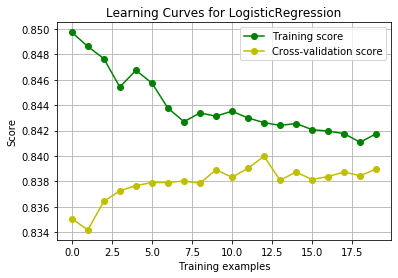

In [294]:
draw_learning_curves(X_train, y_train,clf_A,num_trainings = 20,title = "Learning Curves for LogisticRegression")

[learning_curve] Training set sizes: [ 1351  1991  2631  3271  3911  4551  5191  5831  6472  7112  7752  8392
  9032  9672 10312 10952 11592 12232 12872 13513]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    1.5s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:   35.6s remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:   59.2s remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:  1.5min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:  2.0min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:  2.5min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:  3.0min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:  3.5min remaining:   55.7s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:  4.0min remaining:   26.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.8min finished


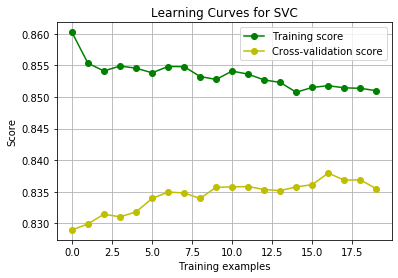

In [50]:
draw_learning_curves(X_train, y_train,clf_B,num_trainings = 20,title = "Learning Curves for SVC")

[learning_curve] Training set sizes: [ 1351  1991  2631  3271  3911  4551  5191  5831  6472  7112  7752  8392
  9032  9672 10312 10952 11592 12232 12872 13513]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    0.5s remaining:   24.2s
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:    2.2s remaining:   14.7s
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    3.7s remaining:   11.6s
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:    5.7s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:    7.0s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:    8.8s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:   10.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:   12.2s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:   13.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.9s finished


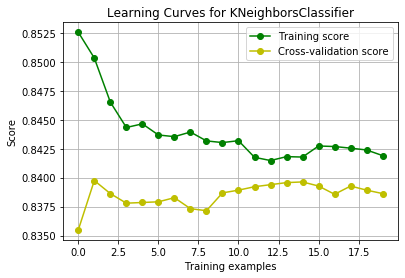

In [295]:
draw_learning_curves(X_train, y_train,clf_A,num_trainings = 20,title = "Learning Curves for KNeighborsClassifier")

[learning_curve] Training set sizes: [ 1351  1991  2631  3271  3911  4551  5191  5831  6472  7112  7752  8392
  9032  9672 10312 10952 11592 12232 12872 13513]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    0.8s remaining:   41.1s
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:    5.5s remaining:   36.7s
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    9.1s remaining:   28.7s
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:   14.9s remaining:   27.7s
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:   19.0s remaining:   22.3s
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:   25.0s remaining:   18.9s
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:   28.8s remaining:   13.5s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:   34.9s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:   39.5s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   44.1s finished


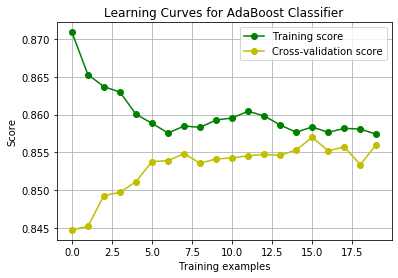

In [296]:
draw_learning_curves(X_train, y_train,clf_D,num_trainings = 20,title = "Learning Curves for AdaBoost Classifier")

[learning_curve] Training set sizes: [ 1351  1991  2631  3271  3911  4551  5191  5831  6472  7112  7752  8392
  9032  9672 10312 10952 11592 12232 12872 13513]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    3.2s remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:   12.2s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:   21.4s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:   33.7s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:   43.8s remaining:   51.4s
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:   58.3s remaining:   44.0s
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:  1.1min remaining:   32.4s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:  1.4min remaining:   23.1s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:  1.7min remaining:   11.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished


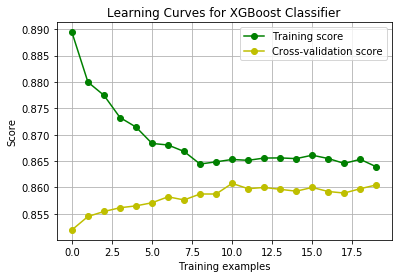

In [297]:
draw_learning_curves(X_train, y_train,clf_E,num_trainings = 20,title = "Learning Curves for XGBoost Classifier")

In [368]:

# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
clf = AdaBoostClassifier(random_state=0)
parameters = {"n_estimators": [10, 100, 200, 400,600],
              "learning_rate": [0.5, 1,1.5, 2]}
scorer = make_scorer(fbeta_score,beta=0.5)
grid_obj = GridSearchCV(clf,parameters,scoring=scorer)
grid_fit = grid_obj.fit(X_train,y_train)
best_clf = grid_fit.best_estimator_
ada_pred = best_clf.predict(X_test)

In [369]:
from sklearn.model_selection import cross_val_predict
ada_pred_cross = cross_val_predict(best_clf, X_train, y_train, cv=5,
                             method="decision_function")

In [370]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

print('AdaBoost Classifier: ', roc_auc_score(y_train, ada_pred_cross))

AdaBoost Classifier:  0.9219422515027464


In [371]:
print("Accuracy Score:{}".format(accuracy_score(y_test,ada_pred)))

Accuracy Score:0.869287236561686


In [372]:
ada_fpr, ada_tpr, ada_thresold = roc_curve(y_train, ada_pred_cross)



Text(0, 0.5, 'True Position Rate')

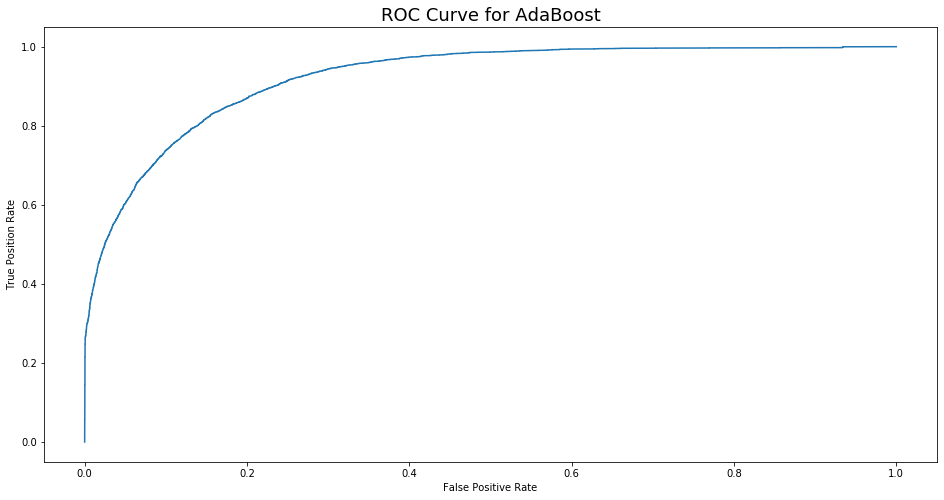

In [373]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve for AdaBoost', fontsize=18)
plt.plot(ada_fpr, ada_tpr, label='AdaBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_train, ada_pred_cross)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Position Rate")

In [379]:
test_pred = best_clf.predict(test)

In [380]:
pred_submission = pd.DataFrame({'Income':test_pred})

In [381]:
pred_submission.to_csv('submission.csv',index = False)

In [382]:
importances = best_clf.feature_importances_

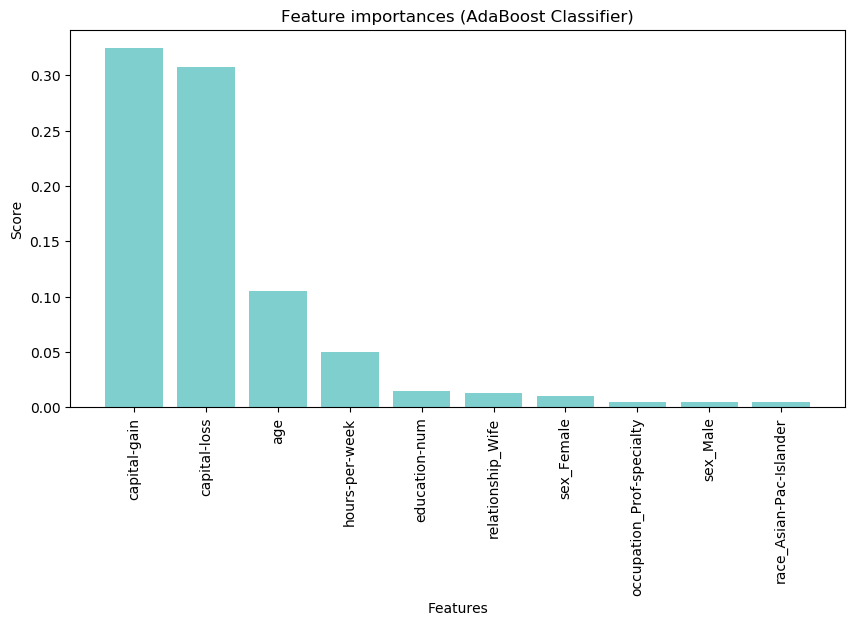

In [383]:
headers = ["name", "score"]
values = sorted(zip(df_new_final.columns, np.abs(importances)), key=lambda x: x[1] * -1)
feature_importances = pd.DataFrame(values, columns = headers)
feature_importances = feature_importances.sort_values(by = ['score'], ascending = False)

features = feature_importances['name'][:10]
y_pos = np.arange(len(features))
scores = feature_importances['score'][:10]

#plot feature importances
plt.figure(figsize=(10,5),dpi=100)
plt.bar(y_pos, scores, align='center', alpha=0.5,color = '#00A0A0')
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (AdaBoost Classifier)')
 
plt.show()

From the features plot we can see that fnlwgt has the most effect on the model and capital-loss and capital gain are other features affecting the outcome of the model. My initial thought was age would have effect on the income predection and it was one of those. One of the feature affecting the model that surprised me was relatinship_wife and relationship_not-in-family. 
We also wanted to analzye the Machine Learning model using the SHAP analysis but SHAP does not support AdaBoost classifier. Use of SHAP will be benificial if this project was based on credit card approval but SHAP also helps with analyzing the features and their impact on the prediction.